### Import necessary libraries and analyse the data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email


import sklearn as sk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import time

In [47]:
data=pd.read_csv(r"C:\Users\samyu\Downloads\spam_ham_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [48]:
print("Count of spam emails:",data['label'].value_counts()['spam'])

Count of spam emails: 1499


In [49]:
print("Count of ham emails:",data['label'].value_counts()['ham'])

Count of ham emails: 3672


In [50]:
data.shape

(5171, 4)

In [51]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [52]:
text=data['text']
text

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

## Data Preprocessing
 Since the data is in raw form, the data is cleaned and transformed to a format that is suitable for analysis or model training

## Removing Punctuations

In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["text"].apply(lambda x: remove_punc(x))

data.head()

,Unnamed: 0,label,text,label_num,body_text_clean
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...


## Tokenization

In [55]:
import re

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))

data.head()

,Unnamed: 0,label,text,label_num,body_text_clean,body_text_tokenized
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,..."


## Removing Stopwords

In [56]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

,Unnamed: 0,label,text,label_num,body_text_clean,body_text_tokenized,body_text_nonstop
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p..."


## Stemming

In [57]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data.head()

,Unnamed: 0,label,text,label_num,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll...","[subject, enron, methanol, meter, 988291, foll..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att...","[subject, hpl, nom, januari, 9, 2001, see, att..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv..."


## Lemmatization

In [58]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

,Unnamed: 0,label,text,label_num,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll...","[subject, enron, methanol, meter, 988291, foll...","[subject, enron, methanol, meter, 988291, foll..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att...","[subject, hpl, nom, januari, 9, 2001, see, att...","[subject, hpl, nom, januari, 9, 2001, see, att..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, offic, cheap, mai..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv...","[subject, indian, spring, deal, book, teco, pv..."


In [59]:
data['body_text_length'] = data.text.str.len()
data['body_text_clean_length'] = data.body_text_clean.str.len()

data.head()

,Unnamed: 0,label,text,label_num,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll...","[subject, enron, methanol, meter, 988291, foll...","[subject, enron, methanol, meter, 988291, foll...",327,312
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att...","[subject, hpl, nom, januari, 9, 2001, see, att...","[subject, hpl, nom, januari, 9, 2001, see, att...",97,89
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...",2524,2442
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, offic, cheap, mai...",414,409
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv...","[subject, indian, spring, deal, book, teco, pv...",336,329


In [60]:
data['body_text_length']

0        327
1         97
2       2524
3        414
4        336
        ... 
5166     534
5167    1114
5168     402
5169     573
5170    1114
Name: body_text_length, Length: 5171, dtype: int64

In [61]:
print("Original Length:",data['body_text_length'].sum())
print("Cleaned Length:",data['body_text_clean_length'].sum())
print("Total Words Removed:",(data['body_text_length'].sum()) - (data['body_text_clean_length'].sum()))

Original Length: 5421235
Cleaned Length: 5088610
Total Words Removed: 332625


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5171 non-null   int64 
 1   label                   5171 non-null   object
 2   text                    5171 non-null   object
 3   label_num               5171 non-null   int64 
 4   body_text_clean         5171 non-null   object
 5   body_text_tokenized     5171 non-null   object
 6   body_text_nonstop       5171 non-null   object
 7   body_text_stemmed       5171 non-null   object
 8   body_text_lemmatized    5171 non-null   object
 9   body_text_length        5171 non-null   int64 
 10  body_text_clean_length  5171 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 444.5+ KB


## Exploratory Data Analysis

In [63]:
data_eda=data

In [64]:
data_eda['num_characters'] = data['text'].apply(len) #storing the total number of characters in each email in a new column
data_eda['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x))) # storing the number of words in each email
data_eda['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # storing the number of sentences
data_eda.head()

,Unnamed: 0,label,text,label_num,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length,num_characters,num_words,num_sentences
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291\r\nthis...,"[Subject, enron, methanol, meter, 988291, this...","[Subject, enron, methanol, meter, 988291, foll...","[subject, enron, methanol, meter, 988291, foll...","[subject, enron, methanol, meter, 988291, foll...",327,312,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january 9 2001\r\n see at...,"[Subject, hpl, nom, for, january, 9, 2001, see...","[Subject, hpl, nom, january, 9, 2001, see, att...","[subject, hpl, nom, januari, 9, 2001, see, att...","[subject, hpl, nom, januari, 9, 2001, see, att...",97,89,97,24,1
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat\r\nho ho ho we re aroun...,"[Subject, neon, retreat, ho, ho, ho, we, re, a...","[Subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...","[subject, neon, retreat, ho, ho, ho, around, w...",2524,2442,2524,551,20
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap mai...,"[Subject, photoshop, windows, office, cheap, m...","[Subject, photoshop, windows, office, cheap, m...","[subject, photoshop, window, offic, cheap, mai...","[subject, photoshop, window, offic, cheap, mai...",414,409,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs\r\nthis deal is to ...,"[Subject, re, indian, springs, this, deal, is,...","[Subject, indian, springs, deal, book, teco, p...","[subject, indian, spring, deal, book, teco, pv...","[subject, indian, spring, deal, book, teco, pv...",336,329,336,71,3


In [65]:
data_eda[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,9.999613
std,1528.513435,336.487397,21.678645
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,3.000000
50%,540.000000,122.000000,6.000000
75%,1237.000000,283.500000,11.000000
max,32258.000000,8863.000000,1163.000000


In [66]:
data_eda[data_eda['label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,8.634259
std,1382.827493,332.179661,21.912879
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,5.000000
75%,1227.250000,294.000000,10.000000
max,32258.000000,8863.000000,1163.000000


In [67]:
data_eda[data_eda['label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,13.344229
std,1825.986210,346.821249,20.724178
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,3.000000
50%,576.000000,116.000000,7.000000
75%,1253.500000,244.000000,15.000000
max,22073.000000,3963.000000,331.000000


<Axes: >

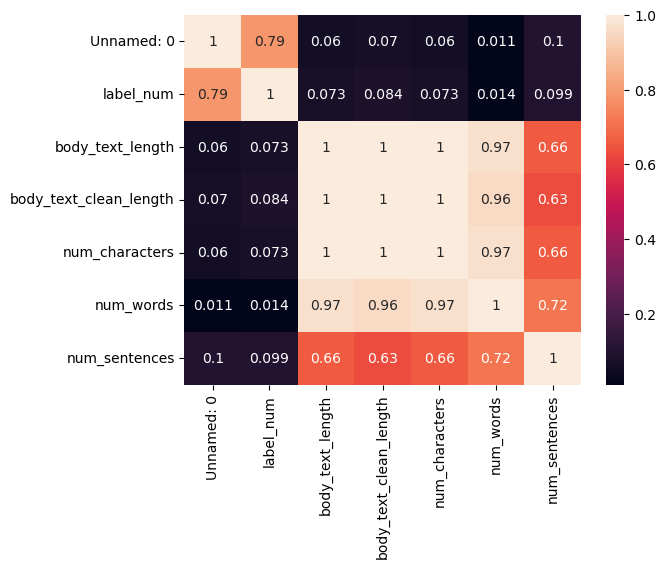

In [68]:
sns.heatmap(data_eda.corr(),annot=True)

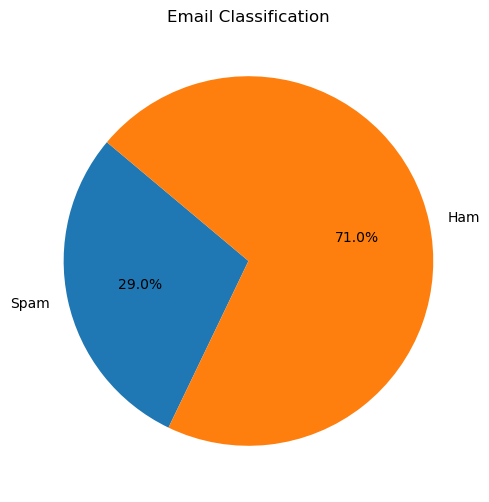

In [69]:
spam_count = 1499
ham_count = 3672

counts = [spam_count, ham_count]
labels = ['Spam', 'Ham']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Email Classification')
plt.show()

In [70]:
data.to_csv("clean.csv") # storing cleaned data in a csv file

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

features = vectors
features

<5171x50447 sparse matrix of type '<class 'numpy.float64'>'
	with 456145 stored elements in Compressed Sparse Row format>

## Applying ML model

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

### Support Vector Machine

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)

clfs = {'SVC' : svc}
def train(model, features, targets):    
    model.fit(features, targets)
def predict(model, features):
    return (model.predict(features))
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred_svm = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred_svm)]))

In [75]:
pred_scores_word_vectors

[('SVC', [0.9832474226804123])]

In [76]:
from sklearn.metrics import classification_report
print("Classification report")
print (classification_report(y_test, pred_svm))
print("Accuracy score: {}".format(round(accuracy_score(y_test,pred_svm),5)))
k2=round(accuracy_score(y_test,pred_svm),5)

Classification report
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       558
        spam       0.95      0.99      0.97       218

    accuracy                           0.98       776
   macro avg       0.97      0.99      0.98       776
weighted avg       0.98      0.98      0.98       776

Accuracy score: 0.98325


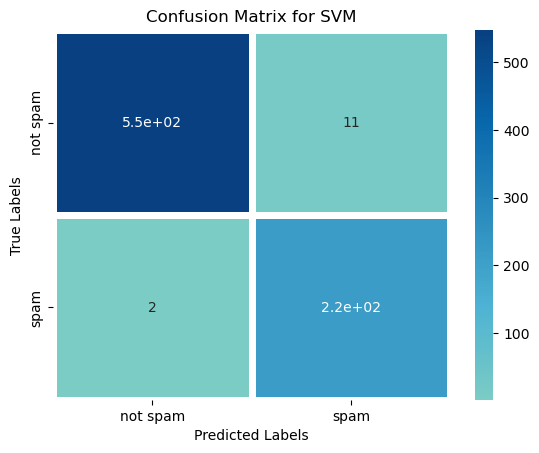

In [77]:
conf_mat = confusion_matrix(y_test,pred_svm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for SVM')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

## Extending the above classification model to a real world scenario:
To address the issue of important emails being wrongly marked as spam, which can lead to missed job offers, important messages, event updates, and more, a real gmail account is conected and the incoming emails are classified as spam or ham to improve the accuracy.

In [80]:
import pickle
with open('class_model.pkl', 'wb') as model_file:
    pickle.dump(svc, model_file)

#### We use the 'imapclient' library to connect to GMAIL'S IMAP server and fetch data from the INBOX folder.

In [81]:
import imapclient
import email

# Create an empty list to store email data
email_data_list = []

# Connect to Gmail's IMAP server
try:
    imap_server = imapclient.IMAPClient('imap.gmail.com', ssl=True)
    imap_server.login('sammzz2003@gmail.com', 'qtbjqwyhbxsgprih')
    
    # Select the INBOX folder in readonly mode
    imap_server.select_folder('INBOX', readonly=True)
    
    # Search for all emails (seen and unseen)
    all_email_ids = imap_server.search('ALL')
    
    for email_id in all_email_ids:
        email_data = imap_server.fetch([email_id], ['BODY[]'])
        
        # Extract and decode email content
        raw_email = email_data[email_id][b'BODY[]']
        msg = email.message_from_bytes(raw_email)
        
        # Get the subject and body
        subject = msg['Subject']
        body = ""
        
        # Append the email data to the list
        email_data_list.append({"Subject": subject, "Body": body})
    
    imap_server.logout()
except Exception as e:
    print(f"An error occurred: {str(e)}")

# Create a DataFrame from the list of dictionaries
email_df = pd.DataFrame(email_data_list)

# Display the DataFrame
print(email_df.head())

                                             Subject Body
0     Sam, finish setting up your new Google Account     
1       Important update about Google Photos storage     
2                                     Security alert     
3  Sam, take the next step on your Windows by con...     
4  =?UTF-8?Q?Share_request_for_=E2=80=98Copy_of_S...     


In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (stopwords and lemmatizer data) if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK's lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


# Preprocessing function for a single text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation, and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in string.punctuation]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the "Subject" and "Body" columns
email_df['Subject'] = email_df['Subject'].apply(preprocess_text)
email_df['Body'] = email_df['Body'].apply(preprocess_text)

# Display the preprocessed DataFrame
print(email_df.head())


                                             Subject Body
0              sam finish setting new google account     
1              important update google photo storage     
2                                     security alert     
3  sam take next step window confirming google ac...     
4  utf-8 q share_request_for_=e2=80=98copy_of_sub...     


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
email_df.shape

(957, 2)

In [84]:
# Combine "Subject" and "Body" columns into a single text column
email_df['Combined_Text'] = email_df['Subject'] + ' ' + email_df['Body']

new_tfidf_matrix = vectorizer.transform(email_df['Combined_Text'])


In [85]:
import pickle
with open('class_model.pkl', 'rb') as model_file:
    spam_model = pickle.load(model_file)

In [86]:
predictions = svc.predict(new_tfidf_matrix)

In [87]:
email_df['Predicted_Label'] = predictions
#email_df[email_df["Predicted_Label"]=="ham"]
email_df.head()

,Subject,Body,Combined_Text,Predicted_Label
0,sam finish setting new google account,,sam finish setting new google account,spam
1,important update google photo storage,,important update google photo storage,spam
2,security alert,,security alert,spam
3,sam take next step window confirming google ac...,,sam take next step window confirming google ac...,spam
4,utf-8 q share_request_for_=e2=80=98copy_of_sub...,,utf-8 q share_request_for_=e2=80=98copy_of_sub...,spam


#### The script updates the dataset with new emails every time it is executed. The incoming emails are iteratively classified as either spam or ham through a learning process.